In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats
import pickle
from sklearn.linear_model import LinearRegression

In [11]:
dpi = 200

plt.rcParams.update({
    'xtick.labelsize': 24,
    'ytick.labelsize': 24,
    'axes.labelsize': 28,
    'figure.dpi': dpi,
    'axes.grid': True,
    'grid.linestyle': '--',
    'figure.figsize':(16,10),
    'axes.titlesize':24
})

# SI-Fig2

In [12]:
dmrgdata = './HChain.DMRG.data.pkl'
with open(dmrgdata, 'rb') as f:
    data = pickle.load(f)
data

{'H4Energy': [-1.91007236115846, -1.56894102690208, -1.6752929504924],
 'H8Energy': [-3.73380416668665, -3.49262328761918, -3.57342346455142],
 'H16Energy': [-7.59087998275753, -7.37523203297522, -7.47487396159715],
 'H32Energy': [-15.8168606923708, -15.5821898199234, -15.7235019700966]}

In [13]:
def getBandGap(energy):
    '''
    A list containing energy in au
    in this order: N, Ionized, EA
    '''
    IP = energy[1]-energy[0]
    EA = energy[0]-energy[2]
    BandGap = IP-EA
    return 27.21139*IP, 27.21139*EA, 27.21139*BandGap

Extrapolated DMRG IP: 6.0383 eV
R² Score: 0.17988


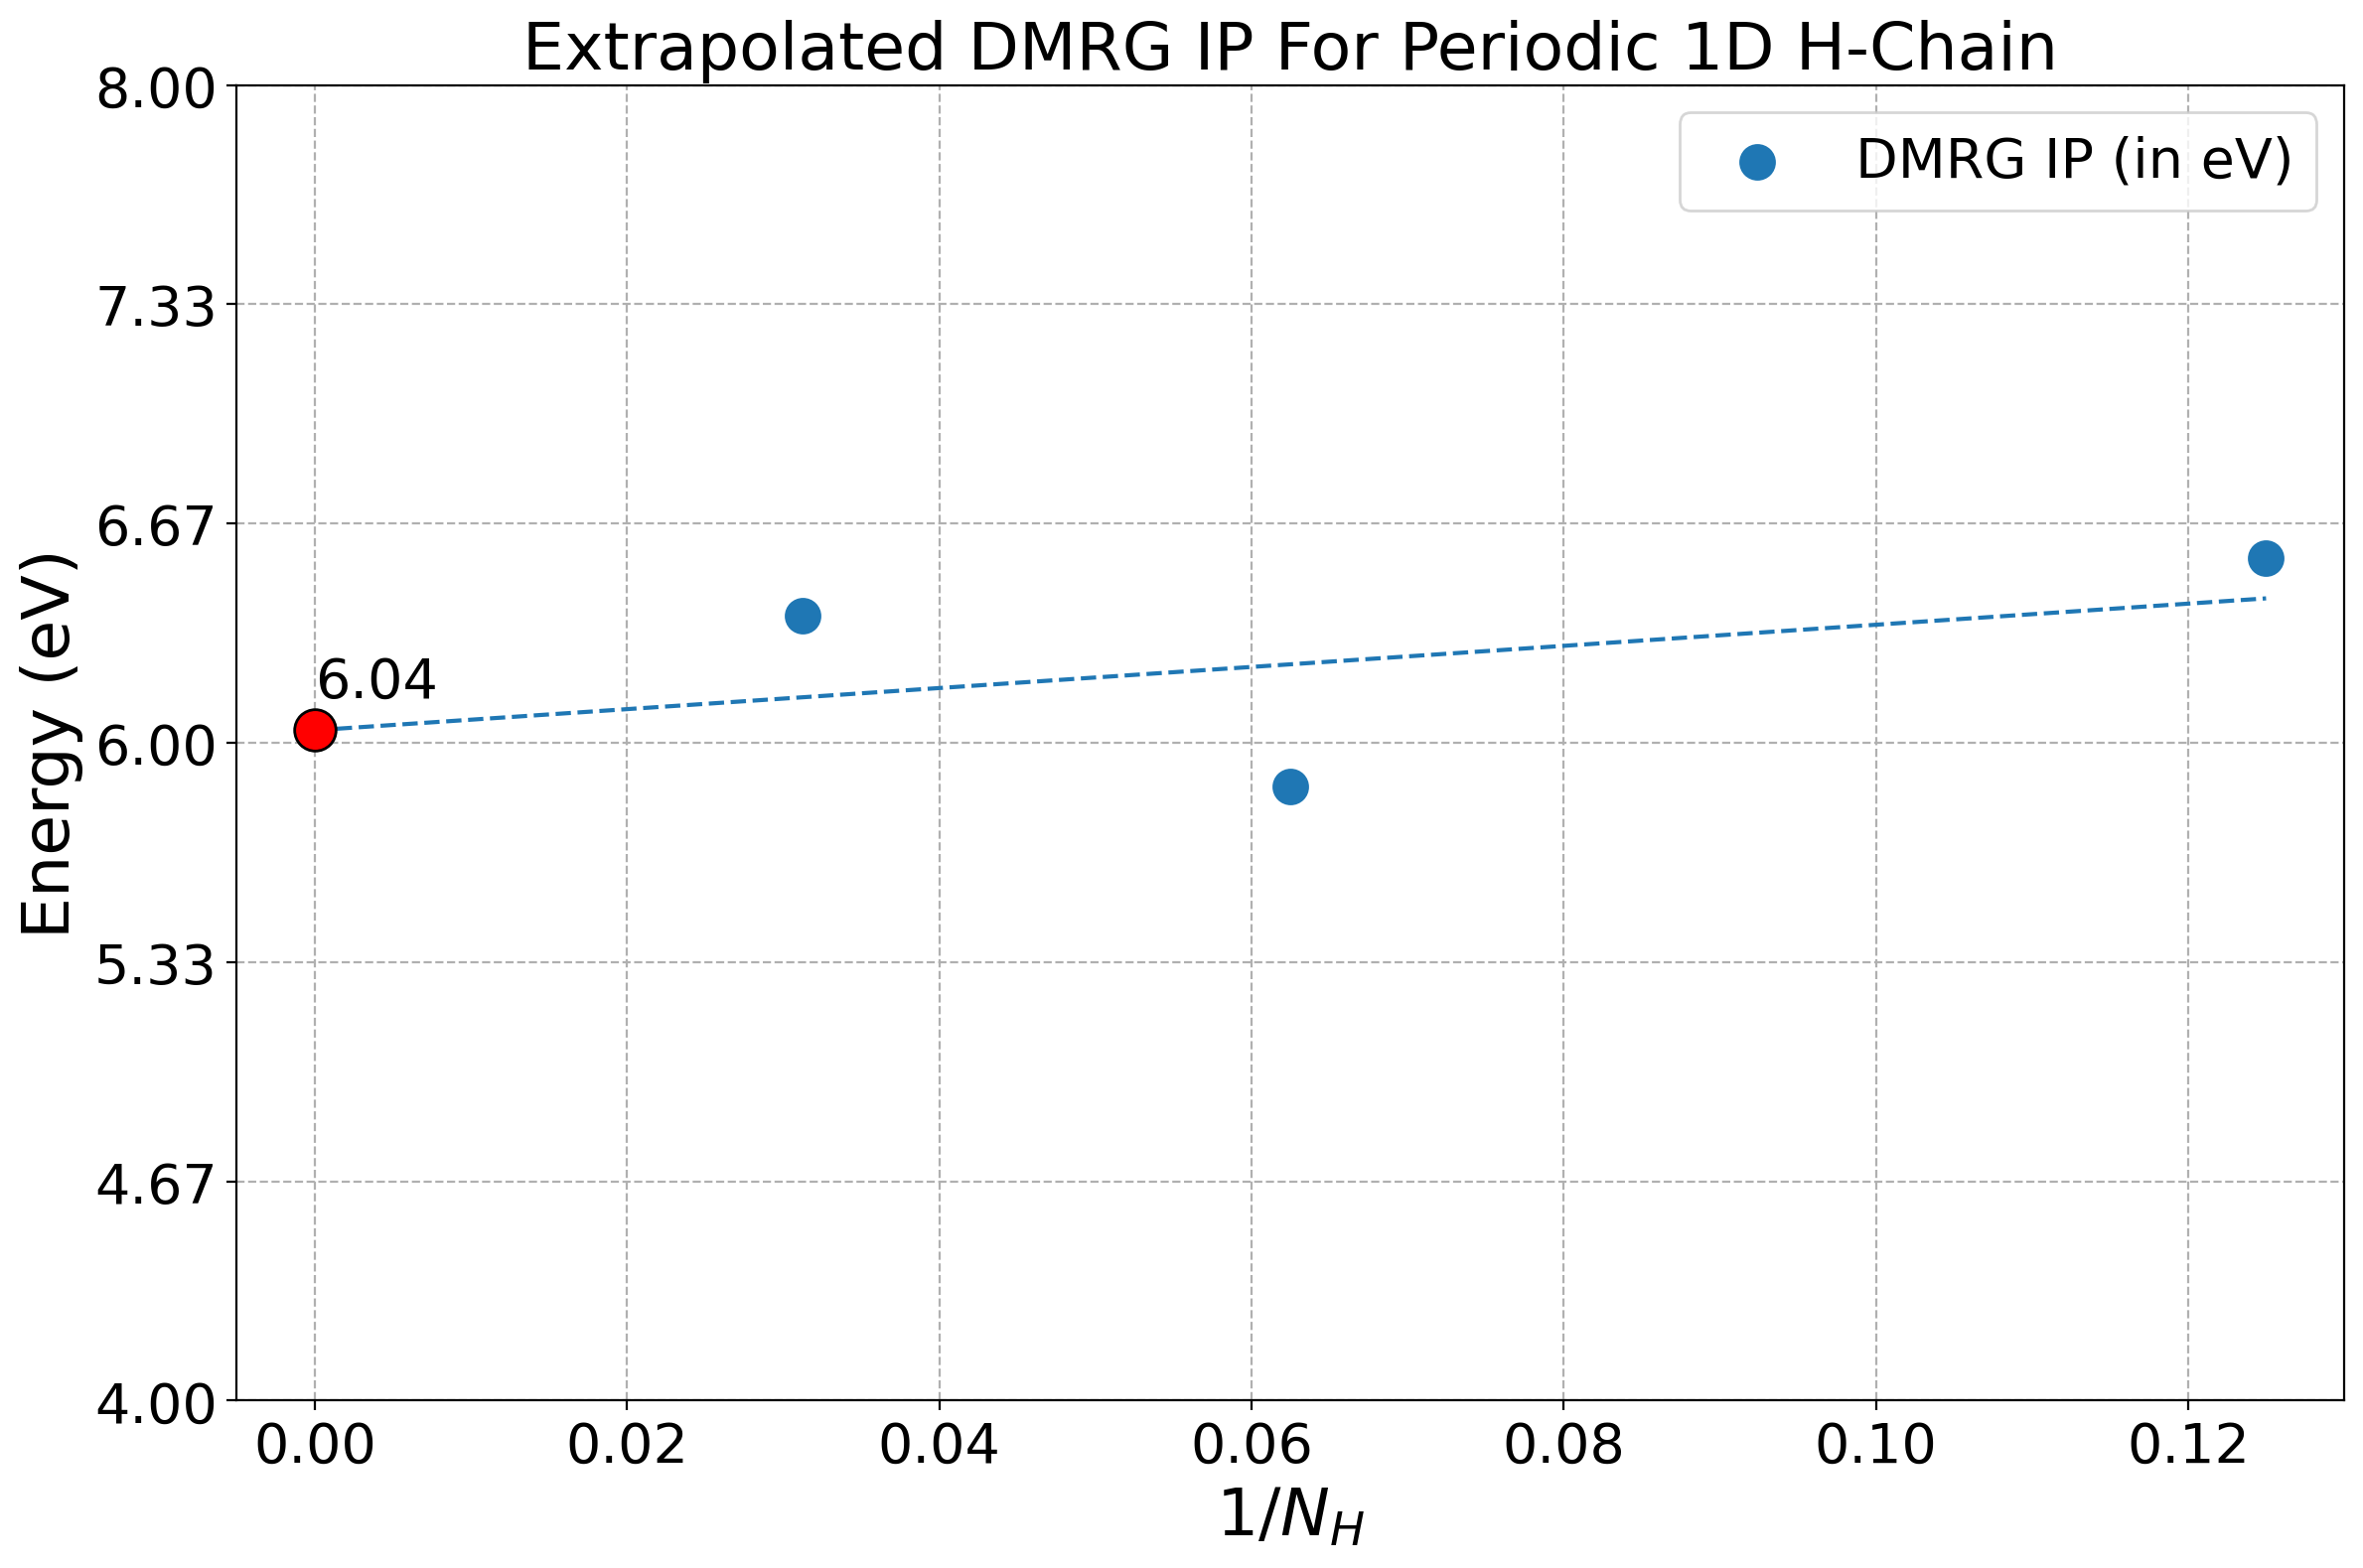

In [14]:
plt.figure(figsize=(12, 8), dpi=dpi)

def DMRGIPextrapolation(nHydrogens):
    '''
    nHydrogens is a list
    '''
    x0 =  np.array([1/x for x in nHydrogens]).reshape(-1, 1)
    y0 =  np.array([getBandGap(data[f'H{x}Energy'])[0] for x in nHydrogens]).reshape(-1, 1)
    
    plt.scatter(x0,y0,label="DMRG IP (in eV)", s=150)
    
    model = LinearRegression()
    model.fit(x0, y0)
    r2 = model.score(x0, y0)
    x_fit = np.linspace(0, max(x0), 100).reshape(-1, 1)
    y_fit = model.predict(x_fit)
    plt.plot(x_fit, y_fit, linestyle="--") #, label="Extrapolated DMRG IP (in eV)")

    plt.xlim(0, max(x0) + max(x0)/10)
    plt.ylim(model.intercept_[0] - 0.5, max(y0) + 1)
    
    yticks = np.linspace(4, 8, num=7)
    plt.yticks(yticks, [f"{ytick:.2f}" for ytick in yticks])
    
    plt.text(0.0, model.intercept_[0]+0.1, f"{model.intercept_[0]:.2f}", fontsize=20)
    plt.plot(0, model.intercept_[0], marker='o', markersize=15, markeredgecolor='black',
         markerfacecolor='red', linestyle='None')
    plt.title("Extrapolated DMRG IP For Periodic 1D H-Chain", fontsize=24)
    plt.ylabel("Energy (eV)",fontsize=24)
    plt.xlim(-0.005, 0.13)
    plt.xlabel(r"$1/N_{H}$",fontsize=24)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(loc='best',fontsize=20)
    plt.tight_layout()
    
    print(f"Extrapolated DMRG IP: {model.intercept_[0]:.4f} eV")
    print(f"R² Score: {r2:.5f}")
    
    return plt

plt = DMRGIPextrapolation([8, 16, 32])
plt.savefig('ExtrapolatedDMRGIPForHChain.png', dpi=dpi)
# plt.close()


Extrapolated EA: -1.9367 eV
R² Score: 1.0000


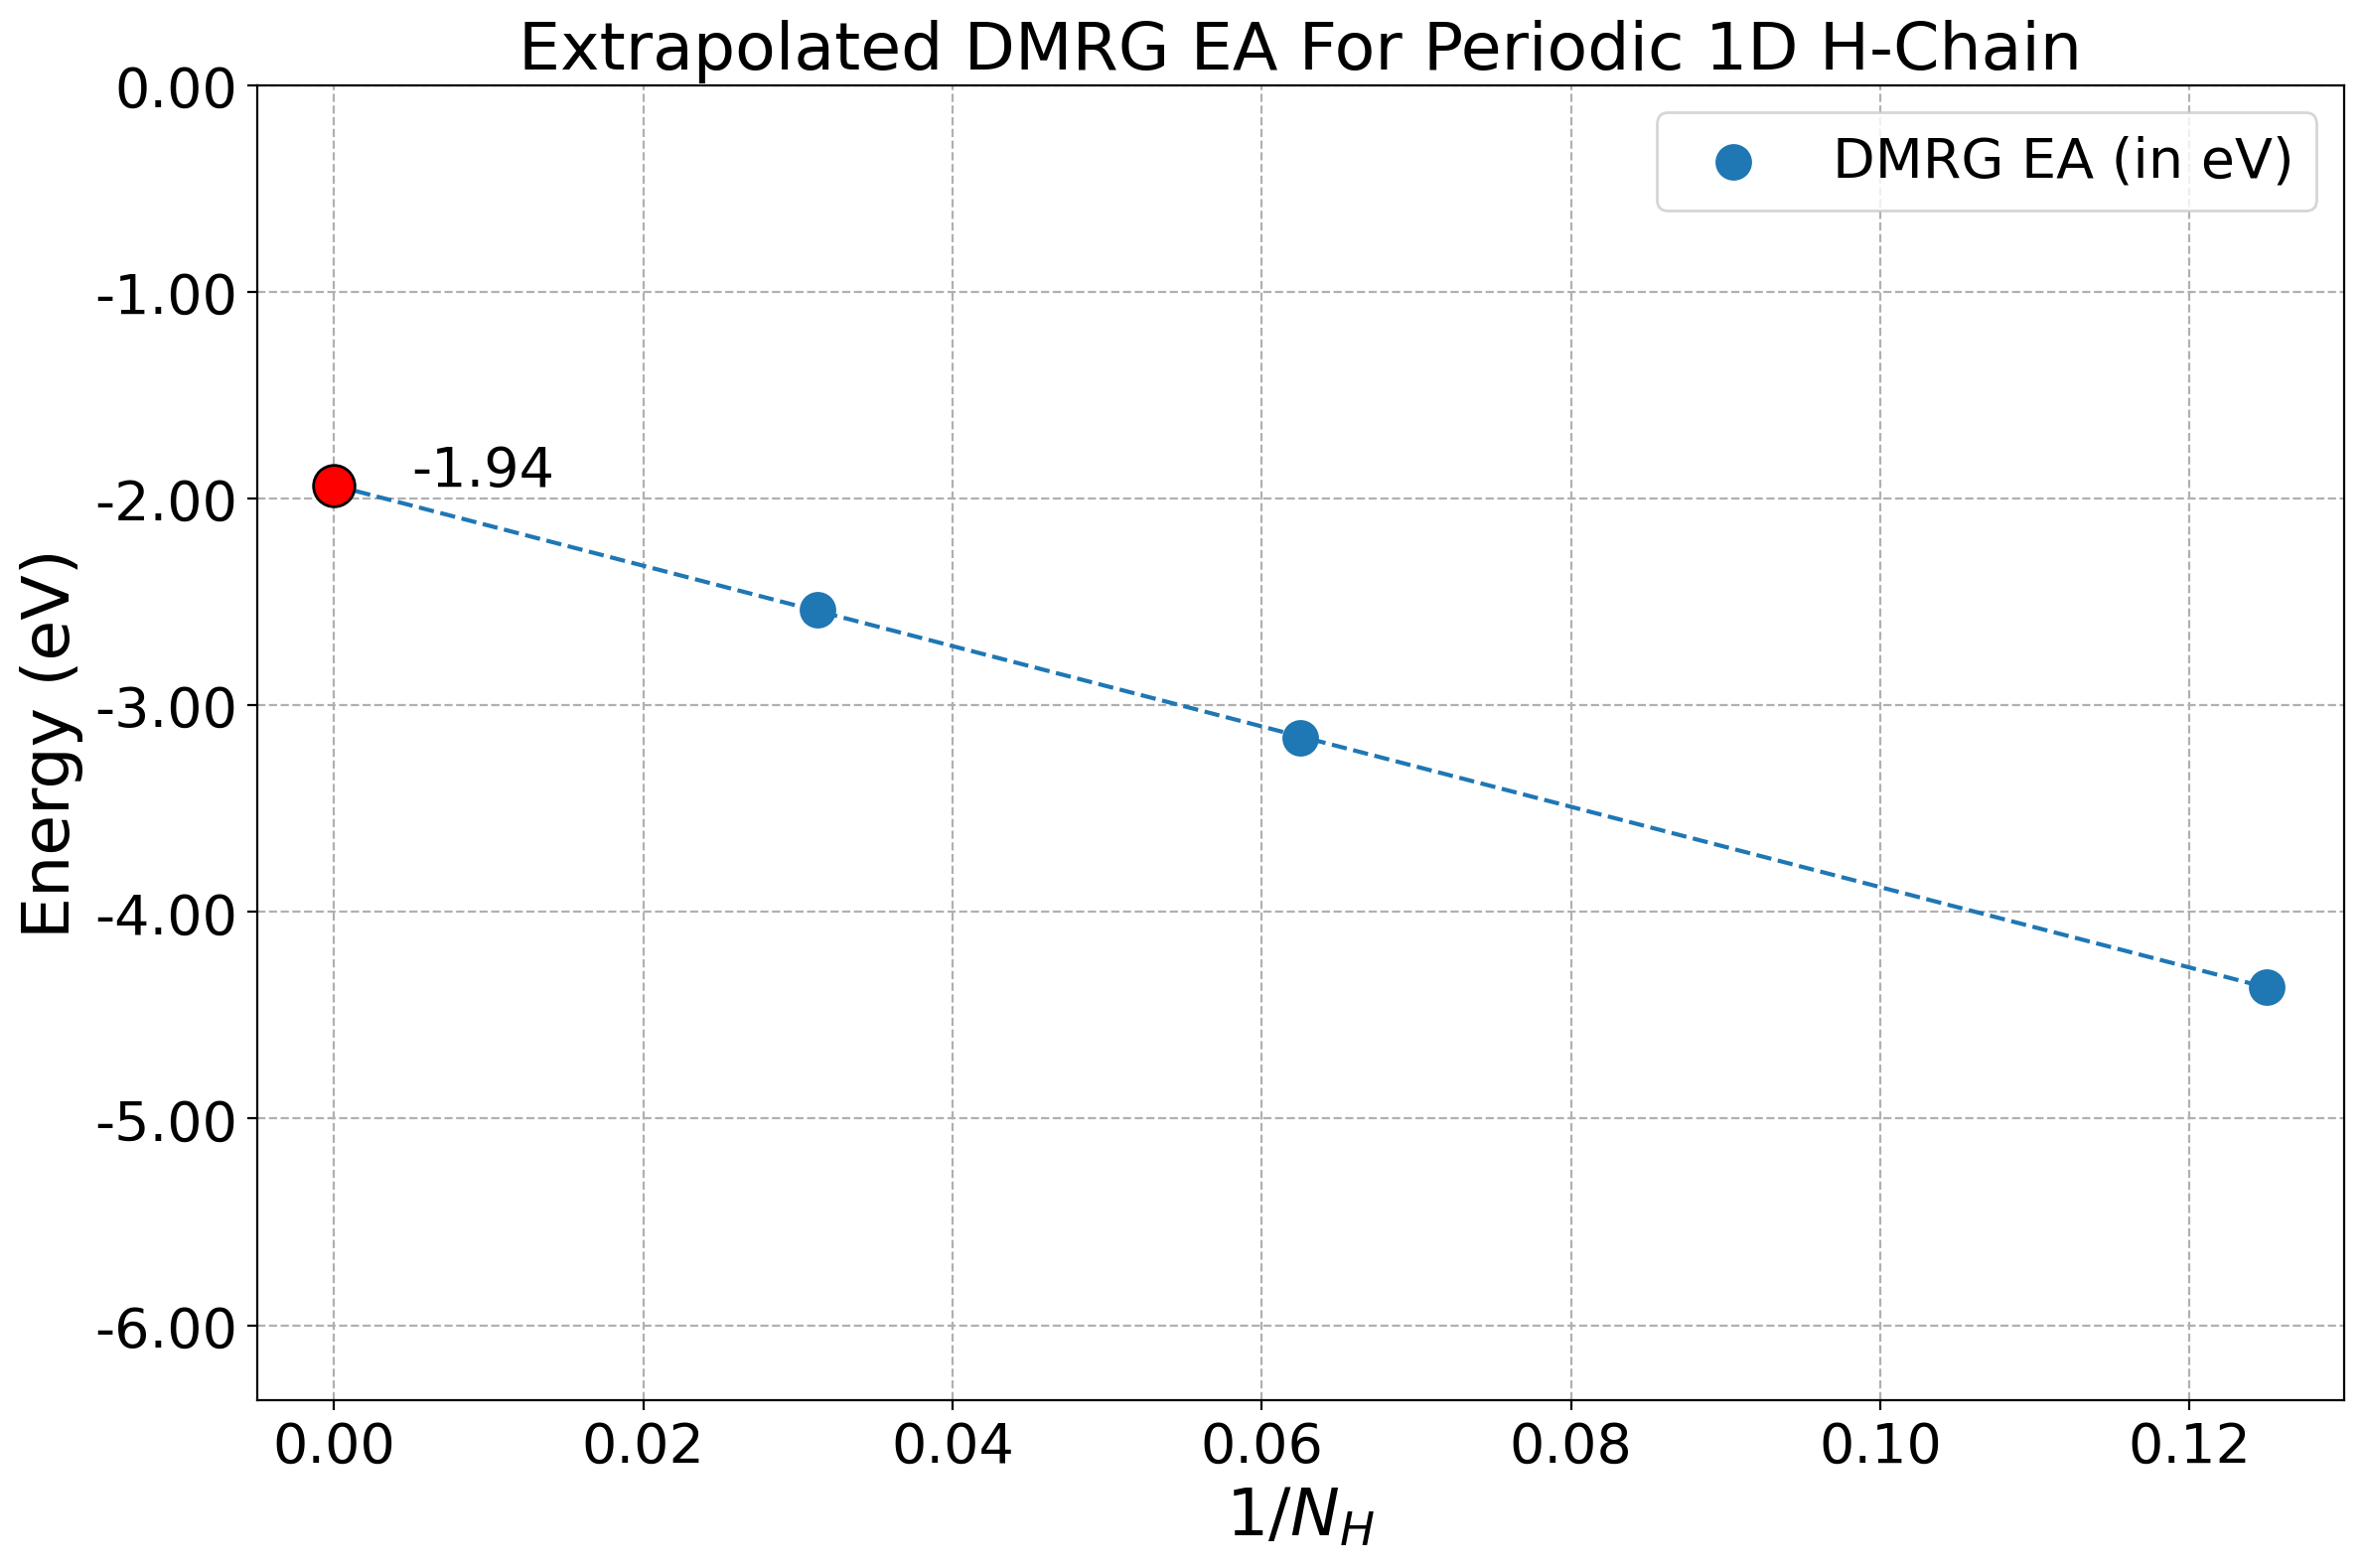

In [15]:
plt.figure(figsize=(12, 8), dpi=dpi)

def DMRGEAextrapolation(nHydrogens, shift=0):
    '''
    nHydrogens is a list
    '''
    
    x0 =  np.array([1/x for x in nHydrogens]).reshape(-1, 1)
    y0 =  np.array([getBandGap(data[f'H{x}Energy'])[1] for x in nHydrogens]).reshape(-1, 1)
    plt.scatter(x0,y0,label="DMRG EA (in eV)", s=150)
    
    model = LinearRegression()
    model.fit(x0, y0)
    r2 = model.score(x0, y0)
    x_fit = np.linspace(0, max(x0), 100).reshape(-1, 1)
    y_fit = model.predict(x_fit)
    plt.plot(x_fit, y_fit, linestyle="--")
    
    
    plt.xlim(0, max(x0) + max(x0)/10)
    plt.ylim(min(y0)-2, 0)
    
    yticks = np.linspace(-6, 0, num=7)
    plt.yticks(yticks, [f"{ytick:.2f}" for ytick in yticks])

    plt.text(0.005, model.intercept_[0] + shift, f"{model.intercept_[0]:.2f}", fontsize=20)
    plt.title("Extrapolated DMRG EA For Periodic 1D H-Chain", fontsize=24)
    plt.ylabel("Energy (eV)",fontsize=24)
    plt.xlim(-0.005, 0.13)
    plt.xlabel(r"$1/N_{H}$",fontsize=24)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(loc='best',fontsize=20)
    plt.plot(0, model.intercept_[0], marker='o', markersize=15, markeredgecolor='black',
         markerfacecolor='red', linestyle='None')
    plt.tight_layout()
    
    print(f"Extrapolated EA: {model.intercept_[0]:.4f} eV")
    print(f"R² Score: {r2:.4f}")
    
    return plt
    
plt = DMRGEAextrapolation([8, 16, 32], shift=0)
plt.savefig('ExtrapolatedDMRGEAForHChain.png', dpi=dpi)
# plt.close()